### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



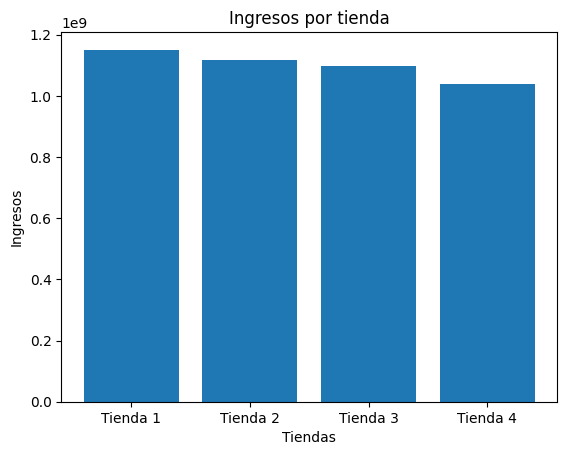

[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]


In [ ]:
#Suma de ingresos por tienda
tiendas = [tienda1, tienda2, tienda3, tienda4]
ingresos_totales = [float(t['Precio'].sum()) for t in tiendas]

#Graficos de barras de los ingresos
plt.bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], ingresos_totales)
plt.xlabel('Tiendas')
plt.ylabel('Ingresos')
plt.title('Ingresos por tienda')
plt.show()
print(ingresos_totales)

# 2. Ventas por categoría

{'Tienda 1': Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64, 'Tienda 2': Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64, 'Tienda 3': Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64, 'Tienda 4': Categoría del Producto
Muebles                    480
Ele

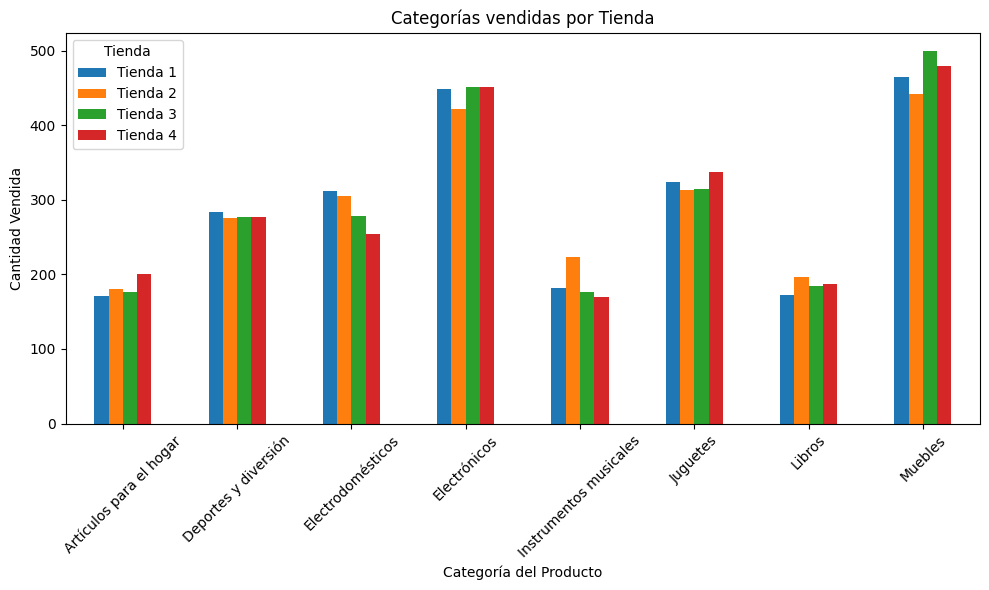

In [ ]:
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

#Dataframe con los conteos de la tienda
categorias_por_tienda = {
    nombre: tienda['Categoría del Producto'].value_counts()
    for nombre, tienda in zip(nombres_tiendas, tiendas)
}
print(categorias_por_tienda)

df_categorias = pd.DataFrame(categorias_por_tienda).fillna(0) #Rellenar Nan con 0
df_categorias = df_categorias.astype(int)

#Transponer si prefieres ver tiendas en el eje X
df_categorias.plot(kind='bar', figsize=(10, 6))
plt.title('Categorías vendidas por Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


{'Tienda 1': np.float64(3.98), 'Tienda 2': np.float64(4.04), 'Tienda 3': np.float64(4.05), 'Tienda 4': np.float64(4.0)}


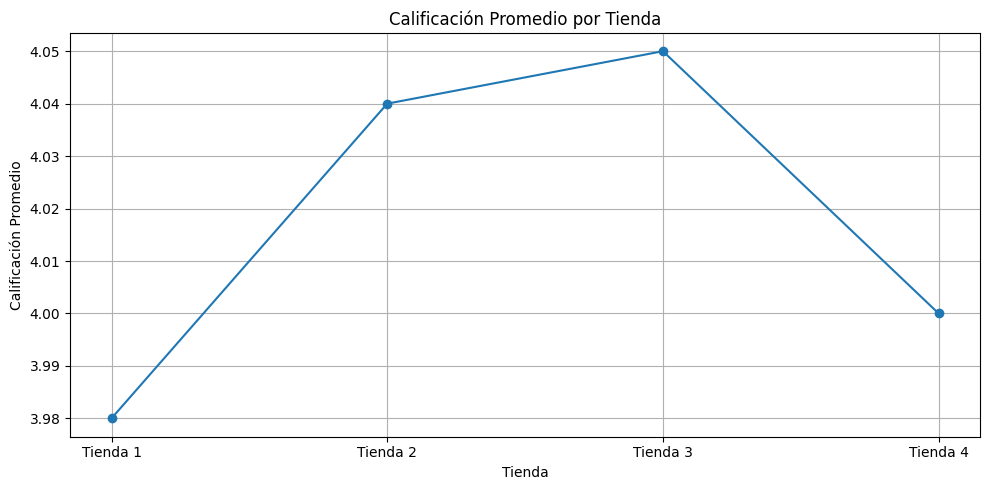

In [ ]:
#Dataframe calificacion por tienda
calificacion_por_tienda = {
    nombre: round(tienda['Calificación'].mean(),2)
    for nombre, tienda in zip(nombres_tiendas, tiendas)
}
print(calificacion_por_tienda)

#Convertir el diccionario en un Dataframe
df_calificacion = pd.DataFrame.from_dict(calificacion_por_tienda, orient='index', columns=['Calificación'])

#Resetear indice para tener las tiendas como columna
df_calificacion = df_calificacion.reset_index().rename(columns={'index':'Tienda'})

#Graficar
plt.figure(figsize = (10,5))
plt.plot(df_calificacion['Tienda'], df_calificacion['Calificación'], marker='o', linestyle='-')

plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

{'Tienda 1': {'Más vendido': 'Microondas', 'cantidad': 60}, 'Tienda 2': {'Más vendido': 'Iniciando en programación', 'cantidad': 65}, 'Tienda 3': {'Más vendido': 'Kit de bancas', 'cantidad': 57}, 'Tienda 4': {'Más vendido': 'Cama box', 'cantidad': 62}}
{'Tienda 1': {'Menos vendido': 'Auriculares con micrófono', 'cantidad': 33}, 'Tienda 2': {'Menos vendido': 'Juego de mesa', 'cantidad': 32}, 'Tienda 3': {'Menos vendido': 'Bloques de construcción', 'cantidad': 35}, 'Tienda 4': {'Menos vendido': 'Guitarra eléctrica', 'cantidad': 33}}


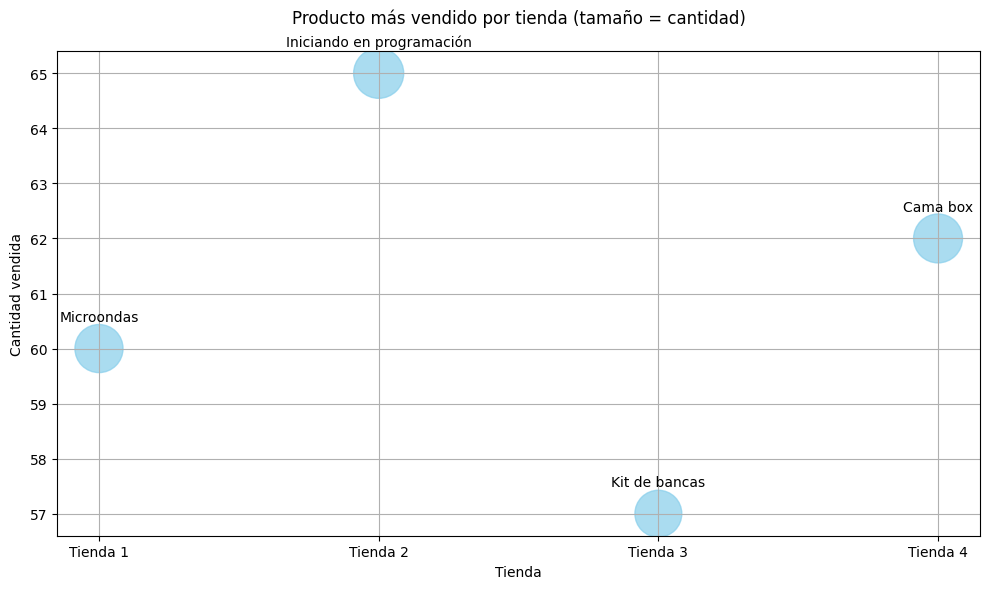

In [ ]:
# Listas de tiendas y sus nombres
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Diccionario para guardar resultados
mas_vendidos_por_tienda = {}
menos_vendidos_por_tienda = {}

# Recorrer cada tienda y encontrar el producto más vendido
for nombre, tienda in zip(nombres_tiendas, tiendas):
    producto_mas_vendido = tienda['Producto'].value_counts().idxmax()
    cantidad_mas_vendido = tienda['Producto'].value_counts().max()
    producto_menos_vendio = tienda['Producto'].value_counts().idxmin()
    cantidad_menos_vendio = tienda['Producto'].value_counts().min()
    mas_vendidos_por_tienda[nombre] = {'Más vendido': producto_mas_vendido, 'cantidad': cantidad_mas_vendido}
    menos_vendidos_por_tienda[nombre] = {'Menos vendido': producto_menos_vendio, 'cantidad': cantidad_menos_vendio}

# Mostrar el diccionario
print(mas_vendidos_por_tienda)
print(menos_vendidos_por_tienda)

# Convertir diccionario a DataFrame
df = pd.DataFrame.from_dict(mas_vendidos_por_tienda, orient='index')
df = df.reset_index().rename(columns={'index': 'Tienda'})

# Gráfico de burbujas
plt.figure(figsize=(10, 6))
plt.scatter(df['Tienda'], df['cantidad'], s=df['cantidad']*20, c='skyblue', alpha=0.7)

for i in range(len(df)):
    plt.text(df['Tienda'][i], df['cantidad'][i]+0.5, df['Más vendido'][i], ha='center')

plt.title('Producto más vendido por tienda (tamaño = cantidad)', pad =20)
plt.xlabel('Tienda')
plt.ylabel('Cantidad vendida')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:
# Diccionario para el promedio del valor del envio por tienda
promedio_envios = {
    nombre: float(round(tienda['Costo de envío'].mean(), 2))
    for nombre, tienda in zip(nombres_tiendas, tiendas)
}

print(promedio_envios)

{'Tienda 1': 26018.61, 'Tienda 2': 25216.24, 'Tienda 3': 24805.68, 'Tienda 4': 23459.46}


DESAFIO

In [ ]:
import folium
from folium.plugins import HeatMap

# Etiqueta tienda
tienda1["tienda"] = "Tienda 1"
tienda2["tienda"] = "Tienda 2"
tienda3["tienda"] = "Tienda 3"
tienda4["tienda"] = "Tienda 4"

# Unir
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Crear columna de ventas (una unidad por fila)
df["ventas"] = df["Precio"]

# Verificar
print(df[["tienda", "Producto", "Precio", "lat", "lon", "ventas"]].head())

# Mapa base
mapa = folium.Map(location=[df["lat"].mean(), df["lon"].mean()], zoom_start=5)

# Preparar datos de heatmap
heat_data = df[["lat", "lon", "ventas"]].values.tolist()

# Añadir heatmap
HeatMap(heat_data, radius=10).add_to(mapa)

# Mostrar el mapa
display(mapa)

     tienda           Producto    Precio       lat       lon    ventas
0  Tienda 1  Asistente virtual  164300.0   4.60971 -74.08175  164300.0
1  Tienda 1    Mesa de comedor  192300.0   6.25184 -75.56359  192300.0
2  Tienda 1      Juego de mesa  209600.0  10.39972 -75.51444  209600.0
3  Tienda 1         Microondas  757500.0   3.43722 -76.52250  757500.0
4  Tienda 1   Silla de oficina  335200.0   6.25184 -75.56359  335200.0


INFORME FINAL

Durante el análisis se evaluó el rendimiento de las cuatro tiendas de la cadena Alura Store con el fin de asesorar al Señor. Juan en la decisión de cuál tienda debería vender para iniciar un nuevo emprendimiento. El estudio se basó en datos concretos relacionados con ingresos, categorías de productos vendidas, calificaciones de los clientes, productos más y menos populares, y el costo promedio de envío.

En cuanto a los ingresos totales, la Tienda 4 presenta el valor más bajo, lo cual evidencia un menor desempeño comercial en comparación con las demás. Además, se observó que categorías clave como Electrodomésticos y Juguetes tienen un volumen de ventas inferior en esta tienda frente a la Tienda 1 y la Tienda 2.

Respecto a la satisfacción de los clientes, si bien la Tienda 1 es la que recibió la calificación más baja, la diferencia respecto a la Tienda 4 es mínima, y esta última no logra compensarlo con ingresos más altos ni mejor posicionamiento en otras métricas. En términos de productos vendidos, aunque la Tienda 4 cuenta con un producto destacado en ventas, no logra sobresalir significativamente, y su producto menos vendido sigue estando entre los de menor rotación.

Por último, aunque la Tienda 4 tiene el costo de envío promedio más económico, este aspecto no ha tenido un impacto positivo en sus ventas ni en la percepción del cliente.

En conclusión, la Tienda 4 representa el menor rendimiento general dentro de Alura Store. Por ello, se recomienda que el Señor. Juan considere vender esta tienda, ya que representa un activo con bajo potencial de crecimiento. Esta decisión le permitirá enfocar sus recursos y esfuerzos en nuevos proyectos con mejores perspectivas.